In [225]:
# Regression 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor

import pickle
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyRegressor
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt

In [226]:
#Open file
with open('Clean_Final_dataset.pickle', 'rb') as data:
        dataset = pickle.load(data)

In [227]:
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,zipcode,lat,long,Monthly_Mortage,Possible_Rent,Net_Profit
0,-0.910698,-0.39269,-1.032247,-0.991458,-0.226669,-0.805022,-0.629165,-0.733655,-0.549724,1.870474,47.5112,-122.257,-0.910696,-0.076586,0.909866
1,0.013431,-0.39269,0.377575,0.579919,-0.188276,1.007535,-0.629165,0.488784,-0.686054,0.879892,47.7210,-122.319,0.013430,-0.076586,-0.043853
2,-1.033194,-1.60071,-1.032247,-1.454957,-0.121764,-0.805022,-0.629165,-1.239918,-1.299535,-0.933060,47.7379,-122.233,-1.033195,-2.194789,0.206753
3,0.206384,0.81533,1.787397,-0.109678,-0.242344,-0.805022,2.447121,-0.894177,-0.208901,1.085485,47.5208,-122.393,0.206386,0.770696,0.088827
4,-0.068428,-0.39269,0.377575,-0.426214,-0.168066,-0.805022,-0.629165,-0.116261,0.540909,-0.073309,47.6168,-122.045,-0.068429,-0.076586,0.040627


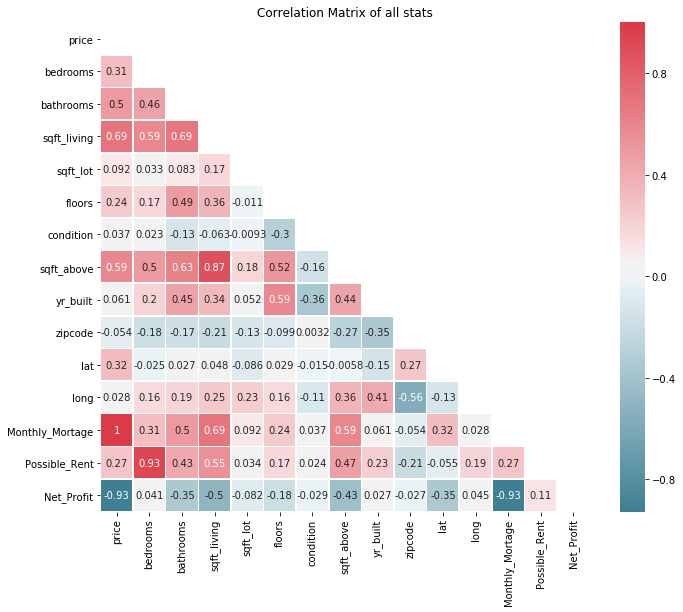

In [228]:
# Compute the correlation matrix
data = dataset[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','sqft_above','yr_built','zipcode','lat','long','Monthly_Mortage','Possible_Rent']]

corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all stats')
plt.show()

In [229]:
#Dropping columns
dataset.drop(['lat','long'],axis = 1,inplace = True)

In [230]:
#Split data into training and testing set with 90% of the data going into training
training, testing = train_test_split(dataset, test_size=0.1, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(dataset.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 21257; training sample size = 19131, testing sample size = 2126


In [231]:
#training and testing
df_train = training.loc[:,dataset.columns]
X_train = df_train.drop(['Net_Profit'], axis=1)
y_train = df_train.loc[:, ['Net_Profit']]

df_test = testing.loc[:,dataset.columns]
X_test = df_test.drop(['Net_Profit'], axis=1)
y_test = df_test.loc[:, ['Net_Profit']]

# Linnear

In [232]:
#LINEAR
from sklearn.model_selection import cross_val_score
# Create the regressor: linreg
linreg = LinearRegression()

# Fit the regressor to the training data
linreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = linreg.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train, y_train, cv=5)

In [233]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: 1.0
Root Mean Squared Error: 5.150511784243456e-16
Average 5-Fold CV Score: 1.0
[1. 1. 1. 1. 1.]


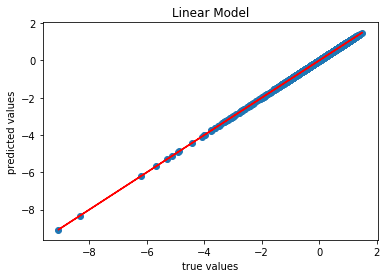

In [234]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Linear Model")
plt.show()

In [235]:
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_pred_s_rf = rf_reg.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

# Random Forest

In [236]:
#Random Forest
print("R^2: {}".format(rf_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_rf))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

R^2: 0.9998920895085817
Root Mean Squared Error: 0.009712588281671108
Average 5-Fold CV Score: 0.9993997396926074
[0.999018   0.9995613  0.99915984 0.99947253 0.99978702]


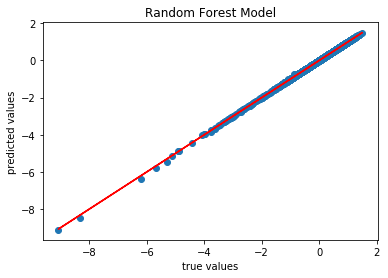

In [237]:
plt.scatter(y_test, y_pred_s_rf)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Random Forest Model")
plt.show()

# Ridge

In [238]:
#Ridge
ridge = Ridge()

ridge.fit(X_train, y_train)

y_pred_s_r = ridge.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_r = cross_val_score(rf_reg, X_train, y_train, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

In [239]:
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_r))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_r)))
# Print the 5-fold cross-validation scores
print(cv_scores_r)

R^2: 0.9999999946989685
Root Mean Squared Error: 6.807432356352627e-05
Average 5-Fold CV Score: 0.9994214467754388
[0.99896077 0.99966118 0.99948444 0.99920386 0.99979697]


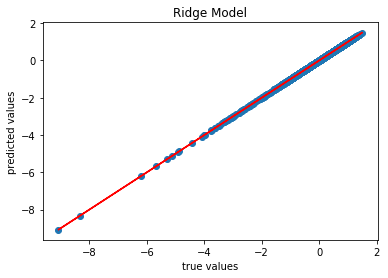

In [240]:
plt.scatter(y_test, y_pred_s_r)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Ridge Model")
plt.show()

# Lasso

In [241]:
lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred_s_l = lasso.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_l = cross_val_score(rf_reg, X_train, y_train, cv=5)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

In [242]:
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_l))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_l)))
# Print the 5-fold cross-validation scores
print(cv_scores_l)

R^2: -7.993679609352711e-07
Root Mean Squared Error: 0.9349821457419912
Average 5-Fold CV Score: 0.9994047910098507
[0.99916516 0.99955371 0.99920833 0.99927792 0.99981883]


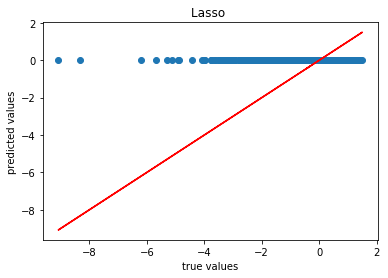

In [243]:
plt.scatter(y_test, y_pred_s_l)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Lasso ")
plt.show()

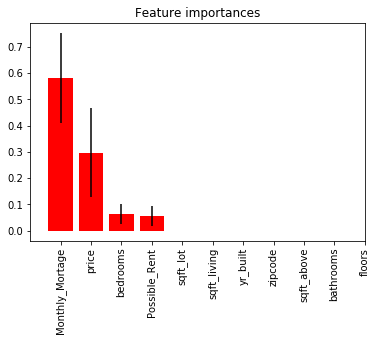

In [244]:
importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],  
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]),X_train.columns[indices], rotation=90)
#plt.xlim([-1, X_train_s.shape[1]])
plt.xlim([-1, 10])
plt.show()

In [224]:
# Feature transformations

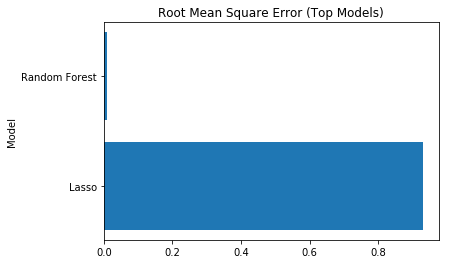

In [250]:
import numpy as np
import matplotlib.pyplot as plt
objects = ('Lasso', 'Random Forest')
y_pos = np.arange(len(objects))
performance = [0.93,0.009]

plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.ylabel('Model')
plt.title('Root Mean Square Error (Top Models)')

plt.show()
plt.show()

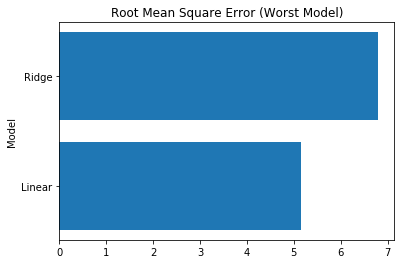

In [251]:
objects = ('Linear', 'Ridge')
y_pos = np.arange(len(objects))
performance = [5.15,6.80]

plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.ylabel('Model')
plt.title('Root Mean Square Error (Worst Model)')

plt.show()
plt.show()

# random forest deep dive

- why random forest works
- Improve the model